<a href="https://colab.research.google.com/github/pablonarco/acs/blob/master/DNS_csv_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV Output from PCAP Files 

Scapy RawPcapReader parsing of fields

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install scapy

     |████████████████████████████████| 911kB 3.5MB/s 
  Created wheel for scapy: filename=scapy-2.4.3-py2.py3-none-any.whl size=1043873 sha256=d2ca1d4b86ee03b2c238c3b302e62a0e99a6845b73b4b870b33879e7f14dae29
  Stored in directory: /root/.cache/pip/wheels/95/bf/51/905b3e84ec4ca910ce4ae92173c7334623105a265bdd1d9438
Successfully built scapy


In [0]:
from scapy.utils import RawPcapReader

Read pcap file and initial parse to count pkts

In [0]:
file_name = '/content/drive/My Drive/Naspet/CTU_Mixed_Capture_1/2015-07-28_mixed.before.infection.pcap'

In [23]:
pkt = RawPcapReader(file_name)
print('All okay in initialisation')

All okay in initialisation


Pkt no, time and DNS query

In [0]:
from scapy.layers.l2 import Ether
from scapy.layers.dns import DNS, DNSQR
from scapy.layers.inet import IP, TCP, UDP

In [26]:
%%time 
i = 0   #pkt count
dns_data=[]
for (pkt_data, pkt_metadata) in RawPcapReader(file_name):
    pkt2 = Ether(pkt_data)
    i += 1
    if 'DNSQR' in pkt2:   # 2048 is identification for IP frame
        time = str(pkt_metadata.sec) +'.' + str(pkt_metadata.usec)
        dns_data.append([i,time, pkt2[IP][DNS][DNSQR].qname])

#print (dns_data)           #List containing required data 
print (f'{len(dns_data)} DNS pkts found')      #no of DNS pkts

16964 DNS pkts found
CPU times: user 2min 23s, sys: 394 ms, total: 2min 24s
Wall time: 2min 24s


##Plotting

In [0]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(24,6))

In [0]:
%%time
a,b,c = zip(*dns_data)
print (a)  
print (b)
print (c)

(14, 15, 19, 20, 21, 22, 23, 24, 25, 26, 31, 32, 43, 44, 49, 50, 63, 64, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 153, 154, 155, 156, 157, 158, 159, 160, 163, 164, 165, 166, 167, 168, 169, 170, 181, 182, 183, 184, 185, 186, 187, 188, 199, 200, 201, 202, 203, 204, 205, 206, 224, 225, 226, 227, 253, 254, 255, 256, 282, 283, 284, 285, 307, 308, 309, 310, 319, 320, 321, 322, 333, 334, 335, 336, 363, 364, 365, 366, 383, 384, 385, 386, 408, 409, 553, 556, 557, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 635, 636, 637, 638, 639, 640, 641, 642, 655, 656, 657, 658, 659, 660, 661, 662, 676, 677, 678, 680, 1121, 1122, 1123, 1125, 2278, 2279, 2280, 2281, 2368, 2374, 2375, 2376, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2613, 2614, 2615, 2617, 52938, 52939, 52940, 52941, 52942, 52943, 52944, 52945, 52946, 52947, 52956, 52957, 52958, 52959, 52960, 52961, 5

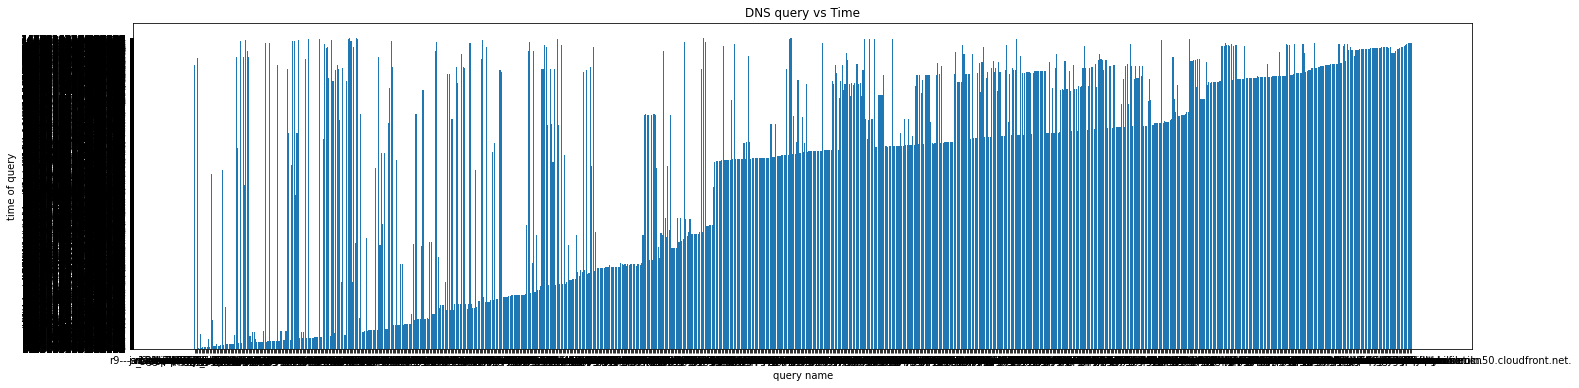

CPU times: user 3min 7s, sys: 19.8 s, total: 3min 27s
Wall time: 3min 28s


In [0]:
%%time
plt.bar(c,b)
plt.xlabel('query name')
plt.ylabel('time of query')
plt.title('DNS query vs Time')
plt.show()

#CSV

In [0]:
import csv

In [0]:
dns_csv=[['Packet Number', 'Time Stamp', 'DNS Query']]
for i,j,k in zip(a,b,c):
    dns_csv.append([i,j,k]) 
print (dns_csv)

[['Packet Number', 'Time Stamp', 'DNS Query'], [1, '1437839498.824642', b'_sleep-proxy._udp.local.'], [1, '1437839498.824666', b'_sleep-proxy._udp.local.'], [1, '1437839499.244664', b'TINY71.local.'], [1, '1437839499.244699', b'TINY71.local.'], [1, '1437839499.494730', b'TINY71.local.'], [1, '1437839499.494766', b'TINY71.local.'], [1, '1437839499.740980', b'TINY71.local.'], [1, '1437839499.741014', b'TINY71.local.'], [1, '1437839499.846125', b'_sleep-proxy._udp.local.'], [1, '1437839499.846159', b'_sleep-proxy._udp.local.'], [1, '1437839502.913252', b'_sleep-proxy._udp.local.'], [1, '1437839502.913288', b'_sleep-proxy._udp.local.'], [1, '1437839512.53199', b'_sleep-proxy._udp.local.'], [1, '1437839512.53225', b'_sleep-proxy._udp.local.'], [1, '1437839539.111734', b'_sleep-proxy._udp.local.'], [1, '1437839539.111767', b'_sleep-proxy._udp.local.'], [1, '1437839620.282990', b'_sleep-proxy._udp.local.'], [1, '1437839620.283021', b'_sleep-proxy._udp.local.'], [1, '1437839628.749332', b'tool

In [0]:
my_file = open('mixed before infection pcap.csv','w')
with my_file:
    w = csv.writer(my_file)
    w.writerows(dns_csv)

print('Write Complete') 

Write Complete
